# **Risultati ottenuti per gli algoritmi di Kruskal naive, Kruskal con Union-Find e Prim**

## **Inclusione delle librerie necessarie**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Esecuzioni senza ripetizioni**

### **Esecuzioni senza ripetizioni Kruskal naive**

In [186]:
df = pd.read_csv('output_kruskal_2021-04-25_16-30-44.csv', sep='\t')

In [187]:
data = []

data.insert(0, {'10': 10, '9': 9, '78809.0000000': '78809.0000000', '0.0000788': '0.0000788', '29316': '29316', '1.1': '1.1'})

df_kruskal = pd.concat([pd.DataFrame(data), df], ignore_index=True)
df_kruskal.drop('1', inplace=True, axis=1)
df_kruskal.columns = ['n_vertices', 'n_edges', 'time', 'time_in_s', 'weight', 'num_calls']

In [188]:
current_n_vertices = 0
sum_times = 0.0
sum_edges = 0

df_tempi_kruskal = pd.DataFrame()

for index, row in df_kruskal.iterrows():

  if current_n_vertices == 0:
    current_n_vertices = row['n_vertices']
  
  if current_n_vertices != row['n_vertices']:
    df_tempi_kruskal_temp = pd.DataFrame({'n_vertices': str(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_tempi_kruskal = pd.concat([df_tempi_kruskal, df_tempi_kruskal_temp], ignore_index=True)

    current_n_vertices = row['n_vertices']
    sum_times = 0.0
    sum_edges = 0

  if index == (df.shape[0]):
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])
    df_tempi_kruskal_temp = pd.DataFrame({'n_vertices': str(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_tempi_kruskal = pd.concat([df_tempi_kruskal, df_tempi_kruskal_temp], ignore_index=True)
  else:
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])

df_tempi_kruskal

,n_vertices,mean_edges,time
0,10,10.75,5.892850e+04
1,20,25.50,1.221532e+05
2,40,52.00,2.676005e+05
3,80,106.25,8.280315e+05
4,100,133.50,1.025597e+06
5,200,268.00,3.250592e+06
6,400,530.50,1.094987e+07
7,800,1061.50,4.010636e+07
8,1000,1321.25,6.270164e+07
9,2000,2670.50,2.470382e+08


In [189]:
ratios = [None] + [round(df_tempi_kruskal.iloc[i + 1]['time'] / df_tempi_kruskal.iloc[i]['time'], 6) for i in range((df_tempi_kruskal.shape[0] - 1))]
ratios

[None,
 2.072906,
 2.190695,
 3.094282,
 1.238596,
 3.169464,
 3.368576,
 3.662726,
 1.563384,
 3.939899,
 3.9967,
 3.918045,
 1.544565,
 4.107953,
 4.939228,
 5.574253,
 1.678447]

In [190]:
c_estimates = [round(df_tempi_kruskal.iloc[i]['time'] / (float(df_tempi_kruskal.iloc[i]['mean_edges']) * float(df_tempi_kruskal.iloc[i]['n_vertices'])), 6) for i in range(df_tempi_kruskal.shape[0])]
c_estimates

[548.172093,
 239.516176,
 128.654087,
 97.415471,
 76.823727,
 60.645368,
 51.601631,
 47.228401,
 47.456306,
 46.253168,
 46.173946,
 45.198312,
 44.892258,
 45.949334,
 56.805017,
 79.190515,
 85.029095]

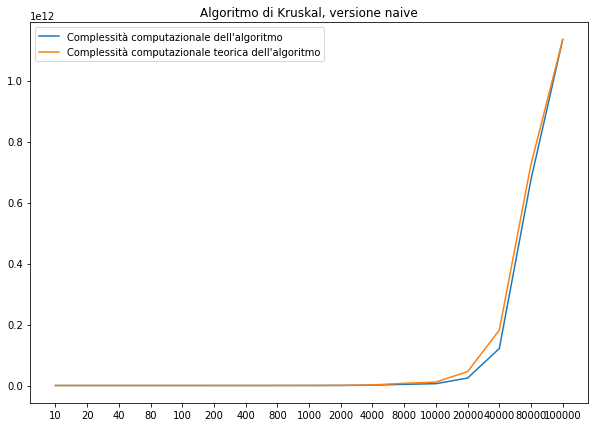

In [192]:
reference = []
for i in range(df_tempi_kruskal.shape[0]):
  reference = [round(85.029095 * float(df_tempi_kruskal.iloc[i]['mean_edges']) * float(df_tempi_kruskal.iloc[i]['n_vertices']), 6) for i in range(df_tempi_kruskal.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_tempi_kruskal['n_vertices'], df_tempi_kruskal['time'], label='Complessità computazionale dell\'algoritmo')
ax.plot(df_tempi_kruskal['n_vertices'], reference, label='Complessità computazionale teorica dell\'algoritmo')
ax.set_title('Algoritmo di Kruskal, versione naive')
ax.legend()
plt.savefig('kruskal_naive_senza_ripetizioni.png')
plt.show()

### **Esecuzioni senza ripetizioni Kruskal Union-Find**

In [193]:
df = pd.read_csv('output_kruskal_uf_2021-04-25_16-30-44.csv', sep='\t')

In [194]:
data = []

data.insert(0, {'10': 10, '9': 9, '78258.0000000': '78258.0000000', '0.0000783': '0.0000783', '29316': '29316', '1.1': '1.1'})

df_kruskal_uf = pd.concat([pd.DataFrame(data), df], ignore_index=True)
df_kruskal_uf.drop('1', inplace=True, axis=1)
df_kruskal_uf.columns = ['n_vertices', 'n_edges', 'time', 'time_in_s', 'weight', 'num_calls']

In [195]:
current_n_vertices = 0
sum_times = 0.0
sum_edges = 0

df_tempi_kruskal_uf = pd.DataFrame()

for index, row in df_kruskal_uf.iterrows():
  
  if current_n_vertices == 0:
    current_n_vertices = row['n_vertices']
  
  if current_n_vertices != row['n_vertices']:
    df_tempi_kruskal_uf_temp = pd.DataFrame({'n_vertices': str(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_tempi_kruskal_uf = pd.concat([df_tempi_kruskal_uf, df_tempi_kruskal_uf_temp], ignore_index=True)

    current_n_vertices = row['n_vertices']
    sum_times = 0.0
    sum_edges = 0

  if index == (df.shape[0]):
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])
    df_tempi_kruskal_uf_temp = pd.DataFrame({'n_vertices': str(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0])
    df_tempi_kruskal_uf = pd.concat([df_tempi_kruskal_uf, df_tempi_kruskal_uf_temp], ignore_index=True)
  else:
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])

df_tempi_kruskal_uf

,n_vertices,mean_edges,time
0,10,10.75,6.443175e+04
1,20,25.50,1.338680e+05
2,40,52.00,2.930790e+05
3,80,106.25,6.418195e+05
4,100,133.50,8.083045e+05
5,200,268.00,1.694560e+06
6,400,530.50,3.755298e+06
7,800,1061.50,8.216295e+06
8,1000,1321.25,1.046867e+07
9,2000,2670.50,2.262977e+07


In [196]:
ratios = [None] + [round(df_tempi_kruskal_uf.iloc[i + 1]['time'] / df_tempi_kruskal_uf.iloc[i]['time'], 6) for i in range((df_tempi_kruskal_uf.shape[0] - 1))]
ratios

[None,
 2.077671,
 2.189313,
 2.18992,
 1.259395,
 2.096438,
 2.21609,
 2.187921,
 1.274136,
 2.161665,
 2.125176,
 2.113452,
 1.262536,
 2.125596,
 2.108903,
 2.162321,
 1.281152]

In [197]:
c_estimates = [round(df_tempi_kruskal_uf.iloc[i]['time'] / (float(df_tempi_kruskal_uf.iloc[i]['mean_edges']) * math.log(float(df_tempi_kruskal_uf.iloc[i]['n_vertices']), 2)), 6) for i in range(df_tempi_kruskal_uf.shape[0])]
c_estimates

[1804.268784,
 1214.672104,
 1059.039979,
 955.508197,
 911.325469,
 827.198452,
 818.938816,
 802.61138,
 795.051432,
 772.76568,
 751.839729,
 732.733073,
 725.5897,
 714.778701,
 705.223538,
 715.911167,
 719.211383]

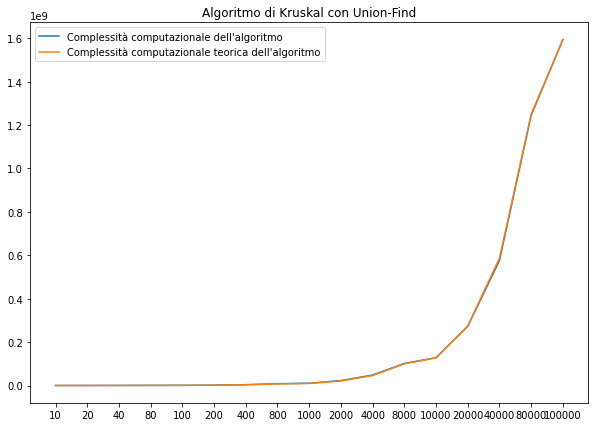

In [199]:
reference = []
for i in range(df_tempi_kruskal_uf.shape[0]):
  reference = [round(719.211383 * float(df_tempi_kruskal_uf.iloc[i]['mean_edges']) * math.log(float(df_tempi_kruskal_uf.iloc[i]['n_vertices']), 2), 6) for i in range(df_tempi_kruskal_uf.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_tempi_kruskal_uf['n_vertices'], df_tempi_kruskal_uf['time'], label='Complessità computazionale dell\'algoritmo')
ax.plot(df_tempi_kruskal_uf['n_vertices'], reference, label='Complessità computazionale teorica dell\'algoritmo')
ax.set_title('Algoritmo di Kruskal con Union-Find')
ax.legend()
plt.savefig('kruskal_uf_senza_ripetizioni.png')
plt.show()

### **Esecuzioni senza ripetizioni Prim**

In [200]:
df = pd.read_csv('output_prim_2021-04-25_16-30-44.csv', sep='\t')

In [201]:
data = []

data.insert(0, {'10': 10, '9': 9, '117332.0000000': '117332.0000000', '0.0001173': '0.0001173', '29316': '29316', '1.1': '1.1'})

df_prim = pd.concat([pd.DataFrame(data), df], ignore_index=True)
df_prim.drop('1', inplace=True, axis=1)
df_prim.columns = ['n_vertices', 'n_edges', 'time', 'time_in_s', 'weight', 'num_calls']

In [202]:
current_n_vertices = 0
sum_times = 0.0
sum_edges = 0

df_prim_tempi = pd.DataFrame()

for index, row in df_prim.iterrows():
  
  if current_n_vertices == 0:
    current_n_vertices = row['n_vertices']
  
  if current_n_vertices != row['n_vertices']:
    df_tempi_prim_temp = pd.DataFrame({'n_vertices': str(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0]) #, index=range(0,16)
    df_prim_tempi = pd.concat([df_prim_tempi, df_tempi_prim_temp], ignore_index=True)

    current_n_vertices = row['n_vertices']
    sum_times = 0.0
    sum_edges = 0

  if index == (df.shape[0]):
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])
    df_tempi_prim_temp = pd.DataFrame({'n_vertices': str(current_n_vertices), 'mean_edges': (sum_edges / 4), 'time': (sum_times / 4)}, index=[0]) #, index=range(0,16)
    df_prim_tempi = pd.concat([df_prim_tempi, df_tempi_prim_temp], ignore_index=True)
  else:
    sum_times += float(row['time'])
    sum_edges += int(row['n_edges'])

df_prim_tempi

,n_vertices,mean_edges,time
0,10,10.75,1.056322e+05
1,20,25.50,2.561412e+05
2,40,52.00,6.095012e+05
3,80,106.25,1.477941e+06
4,100,133.50,1.985463e+06
5,200,268.00,4.621837e+06
6,400,530.50,1.062264e+07
7,800,1061.50,2.433243e+07
8,1000,1321.25,3.163530e+07
9,2000,2670.50,7.219989e+07


In [203]:
ratios = [None] + [round(df_prim_tempi.iloc[i + 1]['time'] / df_prim_tempi.iloc[i]['time'], 6) for i in range((df_prim_tempi.shape[0] - 1))]
ratios

[None,
 2.424839,
 2.379551,
 2.424837,
 1.343398,
 2.327839,
 2.298358,
 2.290621,
 1.300129,
 2.282257,
 2.226575,
 2.214037,
 1.288368,
 2.189828,
 2.212736,
 2.220691,
 1.290932]

In [204]:
c_estimates = [round(df_prim_tempi.iloc[i]['time'] / (float(df_prim_tempi.iloc[i]['mean_edges']) * math.log(float(df_prim_tempi.iloc[i]['n_vertices']), 2)), 6) for i in range(df_prim_tempi.shape[0])]
c_estimates

[2957.997745,
 2324.137441,
 2202.430712,
 2200.283693,
 2238.516266,
 2256.146516,
 2316.538117,
 2376.921451,
 2402.567178,
 2465.495588,
 2513.1821,
 2565.883479,
 2592.856584,
 2631.408631,
 2724.059024,
 2839.990624,
 2874.862482]

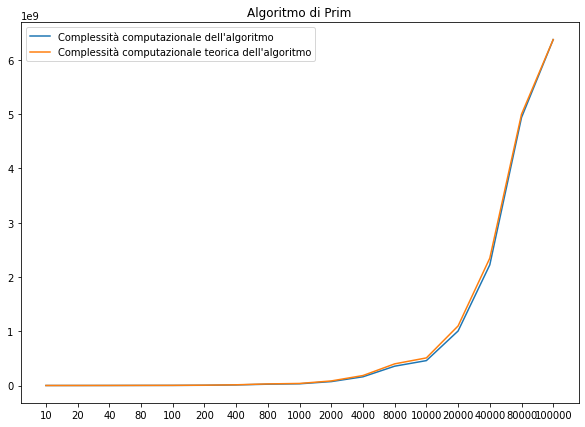

In [206]:
reference = []
for i in range(df_prim_tempi.shape[0]):
  reference = [round(2874.862482 * float(df_prim_tempi.iloc[i]['mean_edges']) * math.log(float(df_prim_tempi.iloc[i]['n_vertices']), 2), 6) for i in range(df_prim_tempi.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_prim_tempi['n_vertices'], df_prim_tempi['time'], label='Complessità computazionale dell\'algoritmo')
ax.plot(df_prim_tempi['n_vertices'], reference, label='Complessità computazionale teorica dell\'algoritmo')
ax.set_title('Algoritmo di Prim')
ax.legend()
plt.savefig('prim_senza_ripetizioni.png')
plt.show()

### **Confronto: Kruskal Union-Find vs Prim**

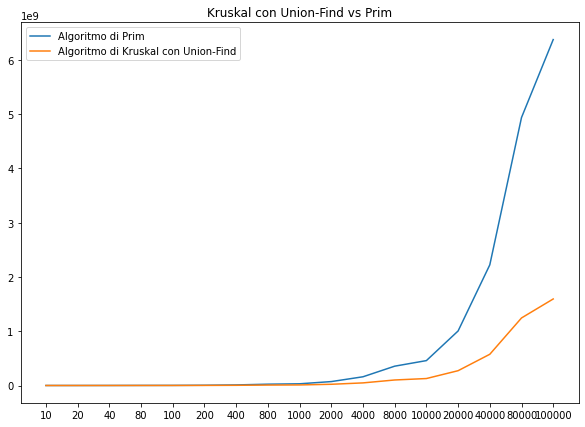

In [208]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_prim_tempi['n_vertices'], df_prim_tempi['time'], label='Algoritmo di Prim')
ax.plot(df_tempi_kruskal_uf['n_vertices'], df_tempi_kruskal_uf['time'], label='Algoritmo di Kruskal con Union-Find')
ax.set_title('Kruskal con Union-Find vs Prim')
ax.legend()
plt.savefig('kruskal_uf_vs_prim_senza_ripetizioni.png')
plt.show()

## **Esecuzioni con ripetizioni**

### **Esecuzioni Kruskal naive**

In [170]:
df = pd.read_csv('quartet_kruskal_2021-04-25_21-44-31.csv', sep='\t')

In [171]:
data = []

data.insert(0, {'10': 10, '( 1 2 3 4 )': '( 1 2 3 4 )', '( 9 11 13 10 )': '( 9 11 13 10 )', '10.75': 10.75, '45035.1676435': 45035.1676435, '0.0000450': 0.0000450, '73364': 73364, '18341': 18341})

df_kruskal = pd.concat([pd.DataFrame(data), df], ignore_index=True)
df_kruskal.columns = ['n_vertices', 'dataset_num', 'n_edges', 'mean_edges', 'time', 'time_in_s', 'n_rep', 'idk2']

In [172]:
ratios = [None] + [round(df_kruskal.iloc[i + 1]['time'] / df_kruskal.iloc[i]['time'], 6) for i in range((df_kruskal.shape[0] - 1))]
ratios

[None,
 2.562473,
 2.217824,
 3.156276,
 1.237876,
 3.215773,
 3.376363,
 3.641519,
 1.552916,
 3.950218,
 3.992168,
 3.923942,
 1.541916,
 4.055268,
 5.016185,
 5.51158,
 1.701934]

In [173]:
c_estimates = [round(df_kruskal.iloc[i]['time'] / (df_kruskal.iloc[i]['mean_edges'] * df_kruskal.iloc[i]['n_vertices']), 9) for i in range(df_kruskal.shape[0])]
c_estimates

[418.931792033,
 226.277254055,
 123.048069394,
 95.037311243,
 74.90467312,
 59.99440398,
 51.165750497,
 46.55832447,
 46.46974184,
 45.410233161,
 45.281044463,
 44.390986172,
 44.014763331,
 44.473390421,
 55.837021811,
 76.96586248,
 83.796830401]

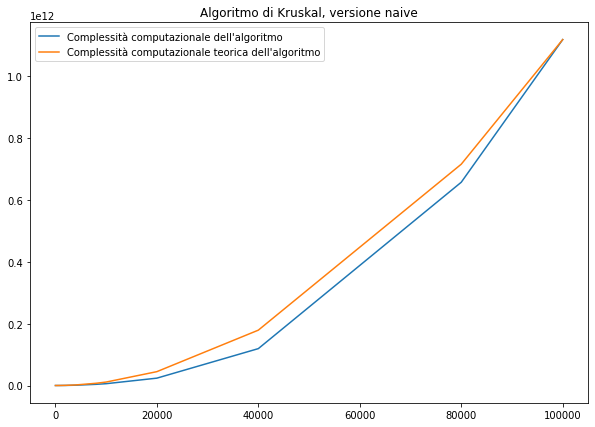

In [174]:
reference = []
for i in range(df_kruskal.shape[0]):
  reference = [round(83.796830401 * df_kruskal.iloc[i]['mean_edges'] * df_kruskal.iloc[i]['n_vertices'], 6) for i in range(df_kruskal.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_kruskal['n_vertices'], df_kruskal['time'], label='Complessità computazionale dell\'algoritmo')
ax.plot(df_kruskal['n_vertices'], reference, label='Complessità computazionale teorica dell\'algoritmo')
ax.set_title('Algoritmo di Kruskal, versione naive')
ax.legend()
plt.savefig('kruskal_naive.png')
plt.show()

### **Esecuzioni Kruskal Union-Find**

In [209]:
df = pd.read_csv('quartet_kruskal_uf_2021-04-25_21-44-31.csv', sep='\t')

In [210]:
data = []

data.insert(0, {'10': 10, '( 1 2 3 4 )': '( 1 2 3 4 )', '( 9 11 13 10 )': '( 9 11 13 10 )', '10.75': 10.75, '46543.8431867': 46543.8431867, '0.0000465': 0.0000465, '67456': 67456, '16864': 16864})

df_kruskal_uf = pd.concat([pd.DataFrame(data), df], ignore_index=True)
df_kruskal_uf.columns = ['n_vertices', 'dataset_num', 'n_edges', 'mean_edges', 'time', 'time_in_s', 'n_rep', 'idk2']

In [211]:
ratios = [None] + [round(df_kruskal_uf.iloc[i + 1]['time'] / df_kruskal_uf.iloc[i]['time'], 6) for i in range((df_kruskal_uf.shape[0] - 1))]
ratios

[None,
 2.445288,
 2.157675,
 2.149974,
 1.291283,
 2.113983,
 2.20742,
 2.165865,
 1.263741,
 2.14803,
 2.108109,
 2.123544,
 1.274558,
 2.108503,
 2.137875,
 2.566855,
 1.277627]

In [212]:
c_estimates = [round(df_kruskal_uf.iloc[i]['time'] / (df_kruskal_uf.iloc[i]['mean_edges'] * math.log(df_kruskal_uf.iloc[i]['n_vertices'], 2)), 6) for i in range(df_kruskal_uf.shape[0])]
c_estimates

[1303.35748,
 1032.700874,
 887.372327,
 786.018908,
 768.654897,
 703.537184,
 693.787423,
 673.100608,
 661.320998,
 638.729184,
 616.442059,
 603.645085,
 603.452333,
 589.680723,
 589.790535,
 710.740934,
 712.052651]

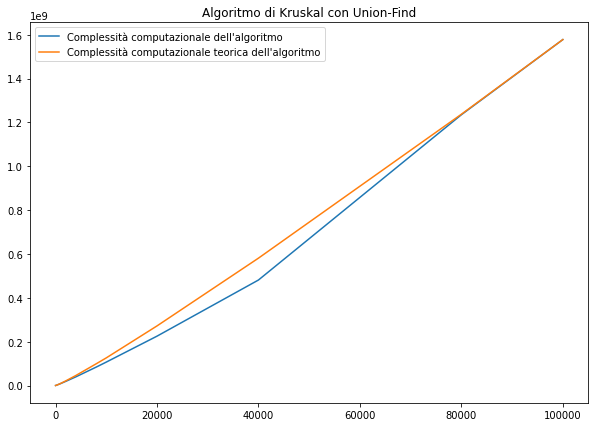

In [213]:
reference = []
for i in range(df_kruskal_uf.shape[0]):
  reference = [round(712.052651 * (df_kruskal_uf.iloc[i]['mean_edges'] * math.log(df_kruskal_uf.iloc[i]['n_vertices'], 2)), 6) for i in range(df_kruskal_uf.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_kruskal_uf['n_vertices'], df_kruskal_uf['time'], label='Complessità computazionale dell\'algoritmo')
ax.plot(df_kruskal_uf['n_vertices'], reference, label='Complessità computazionale teorica dell\'algoritmo')
ax.set_title('Algoritmo di Kruskal con Union-Find')
ax.legend()
plt.savefig('kruskal_union_find.png')
plt.show()

### **Esecuzioni Prim**

In [180]:
df = pd.read_csv('quartet_prim_2021-04-25_21-44-31.csv', sep='\t')

In [181]:
data = []

data.insert(0, {'10': 10, '( 1 2 3 4 )': '( 1 2 3 4 )', '( 9 11 13 10 )': '( 9 11 13 10 )', '10.75': 10.75, '86834.0868442': 86834.0868442, '0.0000868': 0.0000868, '39496': 39496, '9874': 9874})

df_prim = pd.concat([pd.DataFrame(data), df], ignore_index=True)
df_prim.columns = ['n_vertices', 'dataset_num', 'n_edges', 'mean_edges', 'time', 'time_in_s', 'n_rep', 'idk2']

In [182]:
ratios = [None] + [round(df_prim.iloc[i + 1]['time'] / df_prim.iloc[i]['time'], 6) for i in range((df_prim.shape[0] - 1))]
ratios

[None,
 2.761863,
 2.455011,
 2.448773,
 1.333122,
 2.341784,
 2.305991,
 2.299832,
 1.300993,
 2.281372,
 2.230372,
 2.215758,
 1.285168,
 2.197012,
 2.207181,
 2.202024,
 1.294235]

In [183]:
c_estimates = [round(df_prim.iloc[i]['time'] / (df_prim.iloc[i]['mean_edges'] * math.log(df_prim.iloc[i]['n_vertices'], 2)), 6) for i in range(df_prim.shape[0])]
c_estimates

[2431.596724,
 2176.07911,
 2127.519546,
 2146.42582,
 2167.020104,
 2197.171586,
 2263.475873,
 2331.81568,
 2358.540073,
 2419.376641,
 2470.377408,
 2524.142208,
 2544.341054,
 2590.643017,
 2675.125572,
 2765.530157,
 2806.650759]

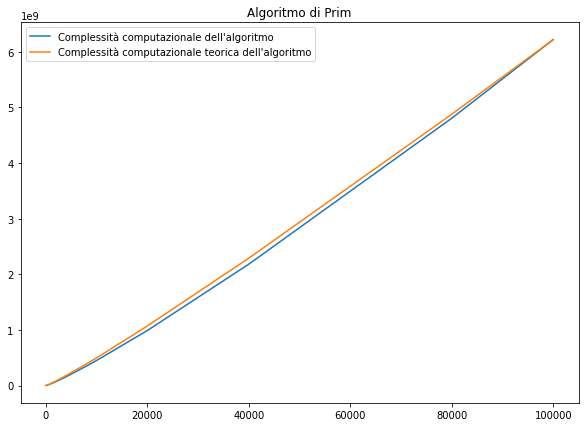

In [184]:
reference = []
for i in range(df_prim.shape[0]):
  reference = [round(2806.650759 * df_prim.iloc[i]['mean_edges'] * math.log(df_prim.iloc[i]['n_vertices'], 2), 6) for i in range(df_prim.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_prim['n_vertices'], df_prim['time'], label='Complessità computazionale dell\'algoritmo')
ax.plot(df_prim['n_vertices'], reference, label='Complessità computazionale teorica dell\'algoritmo')
ax.set_title('Algoritmo di Prim')
ax.legend()
plt.savefig('prim.png')
plt.show()

#### **Confronto: Kruskal Union-Find vs Prim**

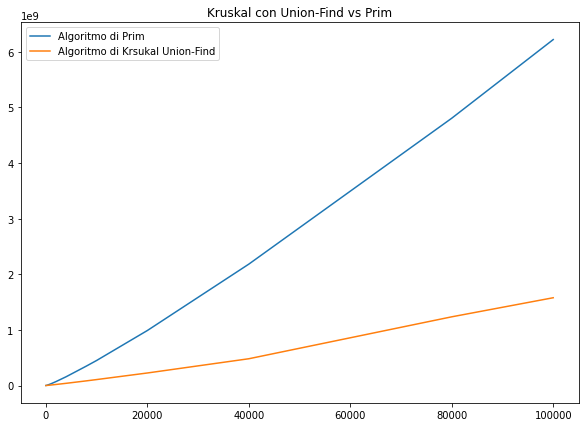

In [185]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_prim['n_vertices'], df_prim['time'], label='Algoritmo di Prim')
ax.plot(df_kruskal_uf['n_vertices'], df_kruskal_uf['time'], label='Algoritmo di Krsukal Union-Find')
ax.set_title('Kruskal con Union-Find vs Prim')
ax.legend()
plt.savefig('kruskal_uf_vs_prim.png')
plt.show()